In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

In [2]:
results_folder = "./model_results"

In [7]:
def plot_training_metrics(loss_train, loss_test, metric_test, interval=2, window_size=10):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import interp1d

    # Normalize the epochs
    normalized_epochs = np.arange(0, len(metric_test) * interval, interval)

    # Interpolate test loss to match the full range of epochs
    original_epochs = np.arange(0, len(loss_test) * interval, interval)
    interp_func = interp1d(original_epochs, loss_test, kind='linear', fill_value='extrapolate')
    interpolated_loss_test = interp_func(np.arange(len(loss_train)))

    # Calculate moving average for dice score
    moving_avg_dice = np.convolve(metric_test, np.ones(window_size)/window_size, mode='valid')

    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:blue'
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss', color=color)
    ax1.plot(np.arange(len(loss_train)), loss_train, label='loss_tr', color='blue')
    ax1.plot(np.arange(len(loss_train)), interpolated_loss_test, label='loss_val', color='red')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:green'
    ax2.set_ylabel('pseudo dice', color=color)  
    ax2.plot(normalized_epochs, metric_test, label='pseudo dice', color='green', linestyle='dotted')
    ax2.plot(normalized_epochs[:len(moving_avg_dice)], moving_avg_dice, label='pseudo dice (mov. avg.)', color='green')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
    plt.show()

## Results Labeler 1

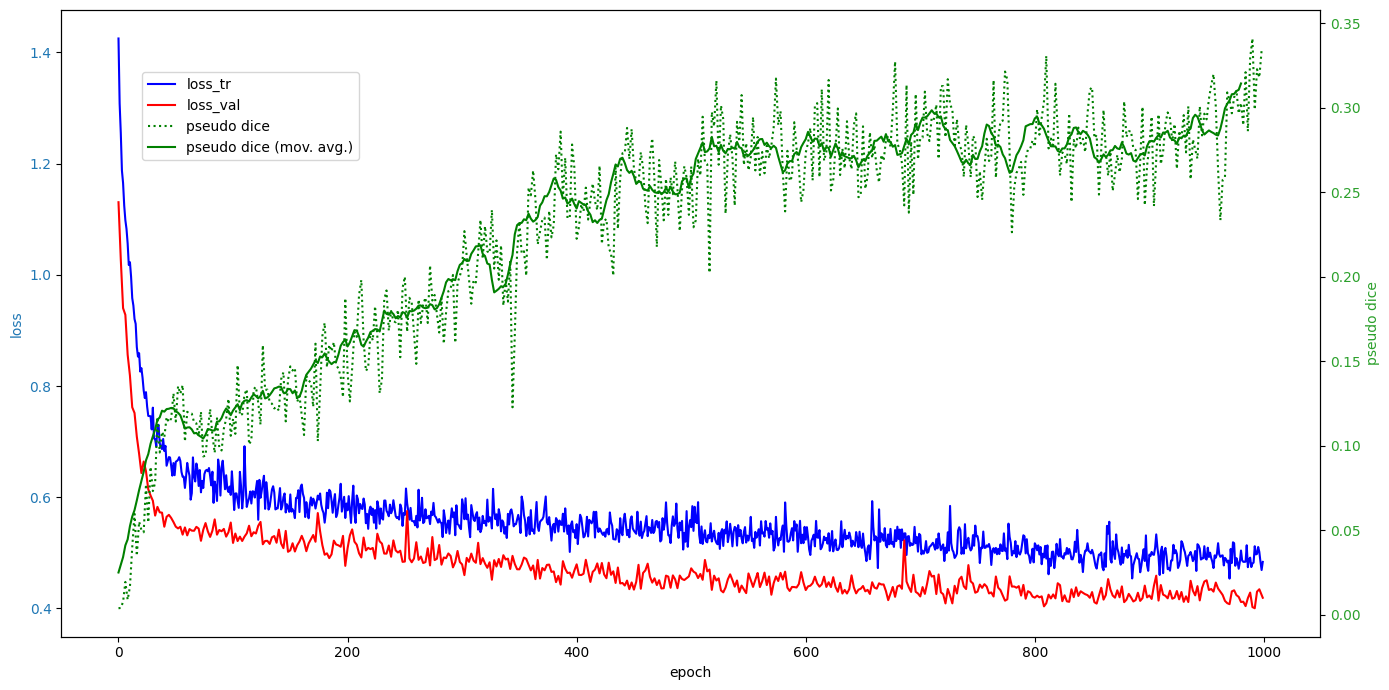

In [14]:
loss_train = np.load(os.path.join(results_folder,'Prostate158_labeler1_loss_train.npy'))
loss_test = np.load(os.path.join(results_folder,'Prostate158_labeler1_loss_test.npy'))
metric_test = np.load(os.path.join(results_folder,'Prostate158_labeler1_metric_test.npy'))
plot_training_metrics(loss_train, loss_test, metric_test)

## Labeler 2

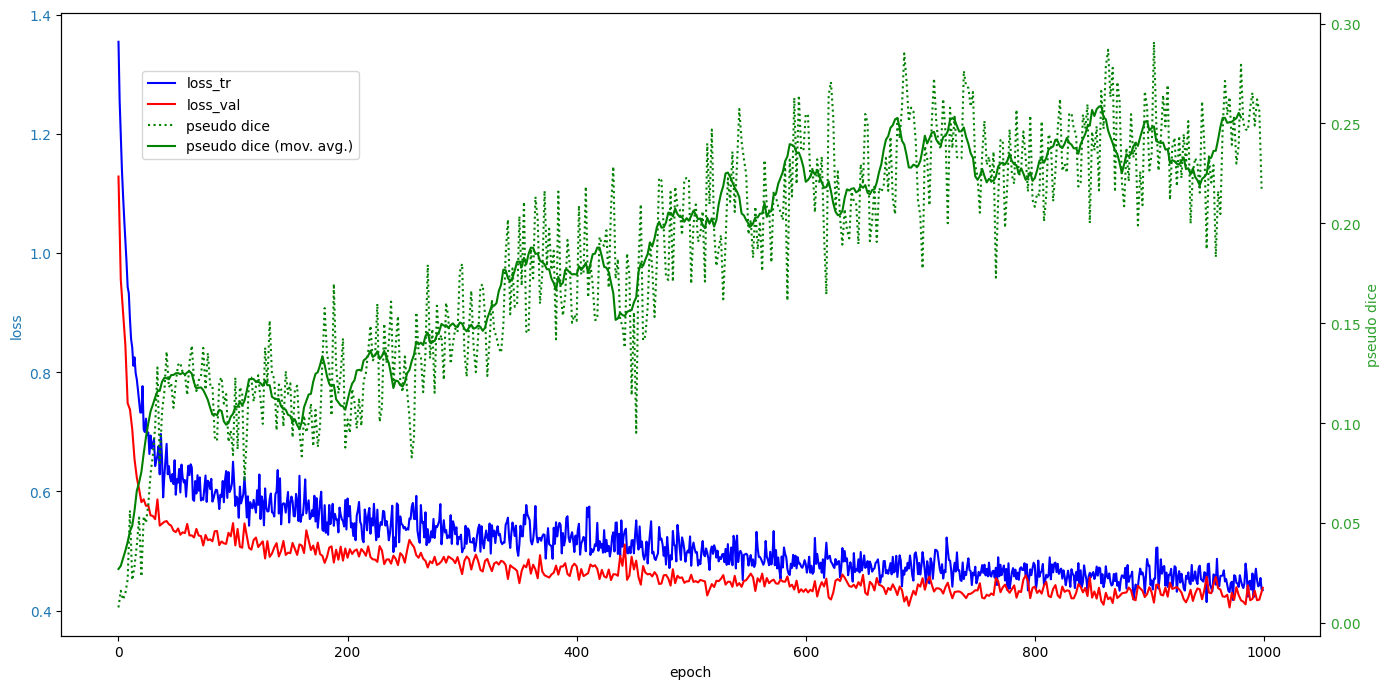

In [13]:
loss_train = np.load(os.path.join(results_folder,'Prostate158_labeler2_loss_train.npy'))
loss_test = np.load(os.path.join(results_folder,'Prostate158_labeler2_loss_test.npy'))
metric_test = np.load(os.path.join(results_folder,'Prostate158_labeler2_metric_test.npy'))

plot_training_metrics(loss_train, loss_test, metric_test)

## Multiple Labelers

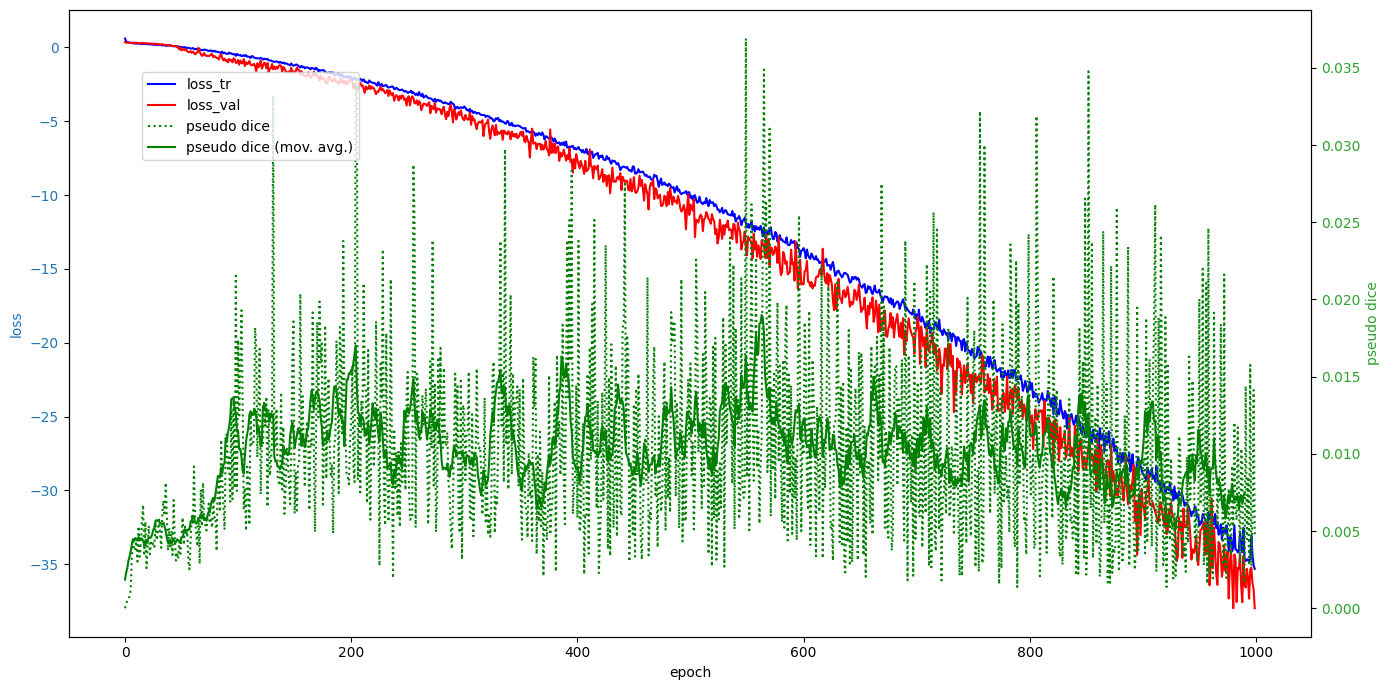

In [16]:
loss_train = np.load(os.path.join(results_folder,'Prostate158_multiple_labelers_loss_train.npy'))
loss_test = np.load(os.path.join(results_folder,'Prostate158_multiple_labelers_loss_test.npy'))
metric_test = np.load(os.path.join(results_folder,'Prostate158_multiple_labelers_metric_test.npy'))

plot_training_metrics(loss_train, loss_test, metric_test, interval=1)